# Baseline Models (Non DL)

In [43]:
import pandas as pd
import numpy as np
from datetime import datetime
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot
from math import sqrt
import matplotlib.pyplot as plt  
import seaborn as sns

## Pre-processing

In [2]:
df = pd.read_csv("../data/Organic_extended_finalv2.csv", sep="|")

In [3]:
max_list = list()
for index, row in df.iterrows():
    num_list = list()
    num_list = {row["1"], row["2"],row["3"], row["4"],row["5"], row["6"]}
    max_list.append(max(num_list))
df["max_retweets"] = max_list

#df["full_text"] = df["title"] + ' ' + df["content"]

In [4]:
print("calculating mean/median")
mean =  df["max_retweets"].mean()
median = df["max_retweets"].median()
print("mean: ", mean)
print("median: ", median)
[print(len(df))]

calculating mean/median
mean:  144.079085973584
median:  49.0
12341


[None]

In [13]:
df

,Unnamed: 0,tweet_id,created_time,count,1,2,3,4,5,6,user_id,screen_name,url,follower_count,title,content,expanded_url,title_len,content_len,max_retweets
0,0,1272217655630458881,2020-06-14 17:21:40+00:00,17,454,463.0,462.0,464.0,464.0,466.0,16664681.0,Los Angeles Times,https://lat.ms/3hro9wq,3634148.0,‘All Black Lives Matter’ painted on Hollywood ...,“All Black Lives Matter” was painted in a rain...,https://www.latimes.com/california/story/2020-...,8,369,466.0
1,1,1272216897237516289,2020-06-14 17:18:39+00:00,17,163,163.0,163.0,163.0,162.0,162.0,28785486.0,ABC News,https://abcn.ws/2UGkIrQ,15735968.0,Millions in lawsuit settlements are another hi...,Millions in lawsuit settlements are another hi...,https://abcnews.go.com/US/millions-lawsuit-set...,14,1766,163.0
2,2,1272220034065186817,2020-06-14 17:31:07+00:00,17,910,927.0,929.0,933.0,934.0,936.0,759251.0,CNN,https://cnn.it/3d4Az9Y,48817611.0,Woman becomes first observant Sikh to graduate...,(CNN) A woman has made history by becoming the...,https://www.cnn.com/2020/06/13/us/first-sikh-w...,15,190,936.0
3,3,1272219784743202816,2020-06-14 17:30:08+00:00,17,2352,2377.0,2381.0,2378.0,2376.0,2373.0,807095.0,The New York Times,https://nyti.ms/2YDi6vY,46861284.0,"As Social Distancing Wanes, Cuomo Warns of Ano...","michael barbaro\n\nDonald, the pandemic feels ...",https://www.nytimes.com/2020/06/14/world/coron...,9,4174,2381.0
4,4,1272220746014572545,2020-06-14 17:33:57+00:00,17,241,267.0,267.0,267.0,267.0,267.0,16664681.0,Los Angeles Times,https://www.latimes.com/california/story/2020-...,3634146.0,They lost loved ones to police violence. Georg...,For families who have lost a loved one to poli...,https://www.latimes.com/california/story/2020-...,16,2826,267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11688,14550,1275957657287999489,2020-06-25 01:03:06+00:00,7,49,49.0,49.0,49.0,49.0,49.0,759251.0,CNN,https://cnn.it/380JIzK,48817590.0,Disney is postponing the reopening of Disneyland,New York (CNN Business) Disney is delaying the...,https://www.cnn.com/2020/06/24/media/disneylan...,7,128,49.0
11689,14551,1275957660693573635,2020-06-25 01:03:07+00:00,7,279,280.0,278.0,279.0,278.0,278.0,759251.0,CNN,https://cnn.it/3i1q8aP,48817597.0,Disney is postponing the reopening of Disneyland,New York (CNN Business) Disney is delaying the...,https://www.cnn.com/2020/06/24/media/disneylan...,7,128,280.0
11690,14552,1275957722656227329,2020-06-25 01:03:21+00:00,7,770,840.0,852.0,851.0,849.0,849.0,16664681.0,Los Angeles Times,https://www.latimes.com/travel/story/2020-06-2...,3634147.0,Nevada issues new face mask order. Las Vegas v...,"Las Vegas visitors, get ready to cover up. Tra...",https://www.latimes.com/travel/story/2020-06-2...,13,509,852.0
11691,14553,1275958143407869952,2020-06-25 01:05:02+00:00,7,16,16.0,16.0,16.0,15.0,15.0,1652541.0,Reuters,https://www.reuters.com/article/us-usa-justice...,22072395.0,Lawmakers split along party lines on Justice D...,WASHINGTON (Reuters) - Attorney General Willia...,https://www.reuters.com/article/us-usa-justice...,10,407,16.0


In [4]:
# Convert date strings to datetime objeccts
date_time = list()
for index, row in df.iterrows():
    if(row["created_time"].lower().islower()):
        # date time w/ letter (Jun, Mon, etc)
        date_time_obj = datetime.strptime(row["created_time"], '%a %b %d %H:%M:%S +0000 %Y')
        date_time.append(date_time_obj)
    else:
        # date time w/ not letters (Jun, Mon, etc)
        date_time_obj = datetime.strptime(row["created_time"], '%Y-%m-%d %H:%M:%S+00:00')
        date_time.append(date_time_obj)
df["created_datetime"] = date_time

In [5]:
df['is_mon'] = 0
df['is_tue'] = 0
df['is_wed'] = 0
df['is_thu'] = 0
df['is_fri'] = 0
df['is_sat'] = 0
df['is_sun'] = 0
df['is_weekend'] = 0

for index, row in df.iterrows():
    day = row["created_datetime"].weekday()
    if day is 0:
        df.at[index,'is_sun'] = 1
        df.at[index,'is_weekend'] = 1
    elif day is 1:
        df.at[index,'is_mon'] = 1
    elif day is 2:
        df.at[index,'is_tue'] = 1
    elif day is 3:
        df.at[index,'is_wed'] = 1
    elif day is 4:
        df.at[index,'is_thu'] = 1
    elif day is 5:
        df.at[index,'is_fri'] = 1
    elif day is 6:
        df.at[index,'is_sat'] = 1
        df.at[index,'is_weekend'] = 1
        

In [73]:
df

,Unnamed: 0,tweet_id,created_time,count,1,2,3,4,5,6,...,max_retweets,created_datetime,is_mon,is_tue,is_wed,is_thu,is_fri,is_sat,is_sun,is_weekend
0,0,1272217655630458881,2020-06-14 17:21:40+00:00,17,454,463.0,462.0,464.0,464.0,466.0,...,466.0,2020-06-14 17:21:40,0,0,0,0,0,1,0,1
1,1,1272216897237516289,2020-06-14 17:18:39+00:00,17,163,163.0,163.0,163.0,162.0,162.0,...,163.0,2020-06-14 17:18:39,0,0,0,0,0,1,0,1
2,2,1272220034065186817,2020-06-14 17:31:07+00:00,17,910,927.0,929.0,933.0,934.0,936.0,...,936.0,2020-06-14 17:31:07,0,0,0,0,0,1,0,1
3,3,1272219784743202816,2020-06-14 17:30:08+00:00,17,2352,2377.0,2381.0,2378.0,2376.0,2373.0,...,2381.0,2020-06-14 17:30:08,0,0,0,0,0,1,0,1
4,4,1272220746014572545,2020-06-14 17:33:57+00:00,17,241,267.0,267.0,267.0,267.0,267.0,...,267.0,2020-06-14 17:33:57,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11688,14550,1275957657287999489,2020-06-25 01:03:06+00:00,7,49,49.0,49.0,49.0,49.0,49.0,...,49.0,2020-06-25 01:03:06,0,0,1,0,0,0,0,0
11689,14551,1275957660693573635,2020-06-25 01:03:07+00:00,7,279,280.0,278.0,279.0,278.0,278.0,...,280.0,2020-06-25 01:03:07,0,0,1,0,0,0,0,0
11690,14552,1275957722656227329,2020-06-25 01:03:21+00:00,7,770,840.0,852.0,851.0,849.0,849.0,...,852.0,2020-06-25 01:03:21,0,0,1,0,0,0,0,0
11691,14553,1275958143407869952,2020-06-25 01:05:02+00:00,7,16,16.0,16.0,16.0,15.0,15.0,...,16.0,2020-06-25 01:05:02,0,0,1,0,0,0,0,0


In [6]:
# Subjectivity and polarity
for index, row in df.iterrows():
    title_score = TextBlob(row["title"]).sentiment
    content_score = TextBlob(row["content"]).sentiment
    df.at[index,'title_polarity'] = title_score[0]
    df.at[index,'title_subjectivity'] = title_score[1]
    df.at[index,'content_polarity'] = content_score[0]
    df.at[index,'content_subjectivity'] = content_score[1]

In [7]:
# source
accounts = ["CNN","The Wall Street Journal","The Washington Post","NBC News",
            "The Associated Press","ABC News","Los Angeles Times","The New York Times","NPR","TIME","U.S. News","USA TODAY",
            "Fox News","Reuters","HuffPost"]
for i in accounts:
    df[i] = 0


for index, row in df.iterrows():
    df.at[index,row["screen_name"]] = 1
    

In [8]:
# 0 -> 0-0.25 quantile
# 1 -> 0.26-0.50 quantile
# 2 -> < 0.51-0.75 quantile
# 3 -> >= 0.76-1.00 quantile


quan_dict=df.max_retweets.quantile([0.25, 0.5, 0.75])
one_quar = quan_dict[0.25]
two_quar = quan_dict[0.5]
three_quar = quan_dict[0.75]

#one_quar = 10
#two_quar = 100
#three_quar = 1000

print("1: ", one_quar, "2: ", two_quar, "3: ", three_quar)

df.loc[df['max_retweets'] <= one_quar, 'shares'] = 0
df.loc[((df['max_retweets'] > one_quar) & (df['max_retweets'] <= two_quar)), 'shares'] = 1
df.loc[((df['max_retweets'] > two_quar) & (df['max_retweets'] <= three_quar)), 'shares'] = 2
df.loc[df['max_retweets'] > three_quar, 'shares'] = 3

1:  24.0 2:  49.0 3:  108.0


## tf-idf vectorization on title 

In [58]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(df.title).toarray()
features.shape
labels = df.shares

X_train, X_test, y_train, y_test = train_test_split(df['title'], df['shares'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)


y_pred = clf.predict(count_vect.transform(X_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred ))

[[403 169  99 105]
 [178 235 184 175]
 [ 80 128 281 243]
 [ 44  75 210 477]]
              precision    recall  f1-score   support

         0.0       0.57      0.52      0.54       776
         1.0       0.39      0.30      0.34       772
         2.0       0.36      0.38      0.37       732
         3.0       0.48      0.59      0.53       806

    accuracy                           0.45      3086
   macro avg       0.45      0.45      0.45      3086
weighted avg       0.45      0.45      0.45      3086



E:\Programs\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Programs\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

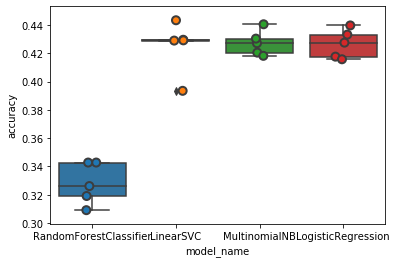

In [59]:
# title tfidf

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

## tf-idf vectorization on content

E:\Programs\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Programs\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

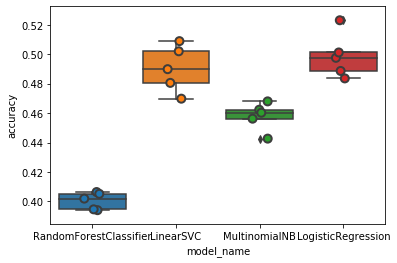

In [5]:
# content tfidf


tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', encoding='latin-1',ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(df.content).toarray()
features.shape
labels = df.shares

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

## tf-idf vectorization on title+content

E:\Programs\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Programs\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

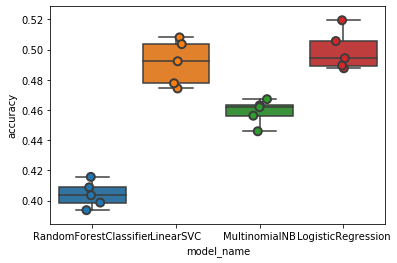

In [7]:
# content+title tfidf 
df["full_text"] = df["title"] + ' ' + df["content"]


tfidf = TfidfVectorizer(sublinear_tf=True, min_df=9, norm='l2', encoding='latin-1',ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(df.full_text).toarray()
features.shape
labels = df.shares

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [46]:
pd.set_option('display.max_columns', None)
df.head(50)


,Unnamed: 0,tweet_id,created_time,count,1,2,3,4,5,6,user_id,screen_name,url,follower_count,title,content,expanded_url,title_len,content_len,max_retweets,created_datetime,is_mon,is_tue,is_wed,is_thu,is_fri,is_sat,is_sun,is_weekend,title_polarity,title_subjectivity,content_polarity,content_subjectivity,CNN,The Wall Street Journal,The Washington Post,NBC News,The Associated Press,ABC News,Los Angeles Times,The New York Times,NPR,TIME,U.S. News,USA TODAY,Fox News,Reuters,HuffPost,shares
0,0,1272217655630458881,2020-06-14 17:21:40+00:00,17,454,463.0,462.0,464.0,464.0,466.0,16664681.0,Los Angeles Times,https://lat.ms/3hro9wq,3634148.0,‘All Black Lives Matter’ painted on Hollywood ...,“All Black Lives Matter” was painted in a rain...,https://www.latimes.com/california/story/2020-...,8,369,466.0,2020-06-14 17:21:40,0,0,0,0,0,1,0,1,-0.166667,0.433333,0.072377,0.383025,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.0
1,1,1272216897237516289,2020-06-14 17:18:39+00:00,17,163,163.0,163.0,163.0,162.0,162.0,28785486.0,ABC News,https://abcn.ws/2UGkIrQ,15735968.0,Millions in lawsuit settlements are another hi...,Millions in lawsuit settlements are another hi...,https://abcnews.go.com/US/millions-lawsuit-set...,14,1766,163.0,2020-06-14 17:18:39,0,0,0,0,0,1,0,1,0.016667,0.266667,0.019223,0.347613,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.0
2,2,1272220034065186817,2020-06-14 17:31:07+00:00,17,910,927.0,929.0,933.0,934.0,936.0,759251.0,CNN,https://cnn.it/3d4Az9Y,48817611.0,Woman becomes first observant Sikh to graduate...,(CNN) A woman has made history by becoming the...,https://www.cnn.com/2020/06/13/us/first-sikh-w...,15,190,936.0,2020-06-14 17:31:07,0,0,0,0,0,1,0,1,0.075000,0.216667,0.209750,0.475417,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0
3,3,1272219784743202816,2020-06-14 17:30:08+00:00,17,2352,2377.0,2381.0,2378.0,2376.0,2373.0,807095.0,The New York Times,https://nyti.ms/2YDi6vY,46861284.0,"As Social Distancing Wanes, Cuomo Warns of Ano...","michael barbaro\n\nDonald, the pandemic feels ...",https://www.nytimes.com/2020/06/14/world/coron...,9,4174,2381.0,2020-06-14 17:30:08,0,0,0,0,0,1,0,1,0.033333,0.066667,0.017214,0.481129,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.0
4,4,1272220746014572545,2020-06-14 17:33:57+00:00,17,241,267.0,267.0,267.0,267.0,267.0,16664681.0,Los Angeles Times,https://www.latimes.com/california/story/2020-...,3634146.0,They lost loved ones to police violence. Georg...,For families who have lost a loved one to poli...,https://www.latimes.com/california/story/2020-...,16,2826,267.0,2020-06-14 17:33:57,0,0,0,0,0,1,0,1,0.418182,0.627273,0.066627,0.399637,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.0
5,5,1272221216078733317,2020-06-14 17:35:49+00:00,17,922,934.0,935.0,935.0,938.0,938.0,5392522.0,NPR,https://trib.al/3bKi32T,8266432.0,Boston Mayor Declares Racism A Public Health C...,Boston Mayor Declares Racism A Public Health C...,https://www.npr.org/sections/live-updates-prot...,8,525,938.0,2020-06-14 17:35:49,0,0,0,0,0,1,0,1,0.000000,0.066667,0.038055,0.294649,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3.0
6,6,1272220892379004929,2020-06-14 17:34:32+00:00,17,30,33.0,33.0,33.0,33.0,33.0,16664681.0,Los Angeles Times,https://www.latimes.com/california/story/2020-...,3634146.0,They lost loved ones to police violence. Georg...,For families who have lost a loved one to poli...,https://www.latimes.com/california/story/2020-...,16,2826,33.0,2020-06-14 17:34:32,0,0,0,0,0,1,0,1,0.418182,0.627273,0.066627,0.399637,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0
7,7,1272221797258194944,2020-06-14 17:38:07+00:00,17,63,72.0,72.0,72.0,72.0,72.0,16664681.0,Los Angeles Times,https://www.latimes.com/california/story/2020-...,3634147.0,They lost loved ones to police violence. Georg...,For families who have lost a loved one to poli...,https://www.latimes.com/california/story/2020-...,16,2826,72.0,2020-06-14 17:38:07,0,0,0,0,0,1,0,1,0.418182,0.627273,0.066627,0.399637,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0
8,8,1272222331398533122,2020-06-14 17:40:15+00:00,17,44,48.0,48.0,48.0,48.0,48.0,16664681.0,Los Angeles Times,https://www.

In [34]:
train = df.drop(['tweet_id','created_time','count','1','2','3','4','5','6','user_id','screen_name','title','content','url','expanded_url','created_datetime','max_retweets'], axis = 1)
X = train.iloc[:, 1:-1]
y=df['shares']
X

,follower_count,title_len,content_len,is_mon,is_tue,is_wed,is_thu,is_fri,is_sat,is_sun,...,ABC News,Los Angeles Times,The New York Times,NPR,TIME,U.S. News,USA TODAY,Fox News,Reuters,HuffPost
0,3634148.0,8,369,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,15735968.0,14,1766,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,48817611.0,15,190,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,46861284.0,9,4174,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,3634146.0,16,2826,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12336,48817590.0,7,128,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12337,48817597.0,7,128,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12338,3634147.0,13,509,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12339,22072395.0,10,407,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.80, random_state=101)

In [36]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)
#train_X[train_X.columns] = scaler.fit_transform(train_X[train_X.columns])

In [12]:
train_X

array([[-1.17814246,  0.96755506,  0.11628413, ..., -0.08924158,
        -0.60637602, -0.18596759],
       [ 0.16764634, -1.12642796, -0.64823989, ..., -0.08924158,
         1.64914172, -0.18596759],
       [-1.17814246,  0.61855789,  2.87267545, ..., -0.08924158,
        -0.60637602, -0.18596759],
       ...,
       [-0.13959979, -1.47542513, -0.68107851, ..., -0.08924158,
        -0.60637602, -0.18596759],
       [-0.29484281,  0.61855789,  0.52984545, ..., -0.08924158,
        -0.60637602, -0.18596759],
       [ 0.16764642,  0.26956072,  0.07010483, ..., -0.08924158,
         1.64914172, -0.18596759]])

[[301 163  91  56]
 [186 201 146  93]
 [ 93 153 189 173]
 [ 57  97 175 295]]
              precision    recall  f1-score   support

         0.0       0.47      0.49      0.48       611
         1.0       0.33      0.32      0.32       626
         2.0       0.31      0.31      0.31       608
         3.0       0.48      0.47      0.48       624

    accuracy                           0.40      2469
   macro avg       0.40      0.40      0.40      2469
weighted avg       0.40      0.40      0.40      2469

Feature: 0, Score: 0.17542
Feature: 1, Score: 0.07774
Feature: 2, Score: 0.15348
Feature: 3, Score: 0.01847
Feature: 4, Score: 0.02239
Feature: 5, Score: 0.01890
Feature: 6, Score: 0.01719
Feature: 7, Score: 0.01252
Feature: 8, Score: 0.00731
Feature: 9, Score: 0.01254
Feature: 10, Score: 0.01160
Feature: 11, Score: 0.07015
Feature: 12, Score: 0.05531
Feature: 13, Score: 0.16273
Feature: 14, Score: 0.15193
Feature: 15, Score: 0.00005
Feature: 16, Score: 0.00127
Feature: 17, Score: 0.

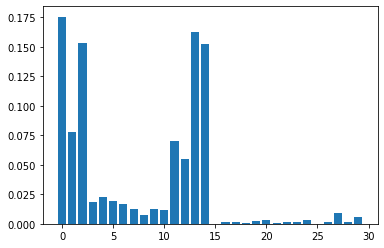

In [37]:
# Check feature importance

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(train_X, train_y)
# test model
y_pred = model.predict(test_X)
accuracy = model.score(test_X, test_y)
cm = confusion_matrix(test_y, y_pred)
print(cm)
print(classification_report(test_y,y_pred ))

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [38]:
# SVM

svm_model_linear = SVC(kernel='poly', C=1, degree=3).fit(train_X, train_y)
svm_predictions = svm_model_linear.predict(test_X)

accuracy = svm_model_linear.score(test_X, test_y)

cm = confusion_matrix(test_y, svm_predictions)
print(cm)
print(classification_report(test_y,svm_predictions ))

[[441 103  35  32]
 [310 122 109  85]
 [162  89 150 207]
 [ 85  42 126 371]]
              precision    recall  f1-score   support

         0.0       0.44      0.72      0.55       611
         1.0       0.34      0.19      0.25       626
         2.0       0.36      0.25      0.29       608
         3.0       0.53      0.59      0.56       624

    accuracy                           0.44      2469
   macro avg       0.42      0.44      0.41      2469
weighted avg       0.42      0.44      0.41      2469



[[414 116  38  43]
 [212 207 121  86]
 [104 123 165 216]
 [ 52  64 120 388]]
              precision    recall  f1-score   support

         0.0       0.53      0.68      0.59       611
         1.0       0.41      0.33      0.36       626
         2.0       0.37      0.27      0.31       608
         3.0       0.53      0.62      0.57       624

    accuracy                           0.48      2469
   macro avg       0.46      0.48      0.46      2469
weighted avg       0.46      0.48      0.46      2469

Feature: 0, Score: 0.10140
Feature: 1, Score: 0.09652
Feature: 2, Score: 0.14853
Feature: 3, Score: 0.01547
Feature: 4, Score: 0.01658
Feature: 5, Score: 0.01313
Feature: 6, Score: 0.01292
Feature: 7, Score: 0.01135
Feature: 8, Score: 0.00828
Feature: 9, Score: 0.01006
Feature: 10, Score: 0.01176
Feature: 11, Score: 0.07378
Feature: 12, Score: 0.07533
Feature: 13, Score: 0.14395
Feature: 14, Score: 0.14529
Feature: 15, Score: 0.01520
Feature: 16, Score: 0.00442
Feature: 17, Score: 0.

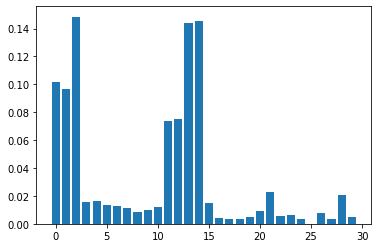

In [45]:
# Random Forest
model = RandomForestClassifier(n_estimators = 55, criterion = 'entropy', random_state = 10)
model.fit(train_X, train_y)

y_pred = model.predict(test_X)


cm = confusion_matrix(test_y, y_pred)
print(cm)
print(classification_report(test_y,y_pred ))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [40]:
# KNN
model = KNeighborsClassifier(n_neighbors=6)

model.fit(train_X, train_y)
y_pred = model.predict(test_X)

cm = confusion_matrix(test_y, y_pred)
print(cm)
print(classification_report(test_y,y_pred ))

[[398 138  54  21]
 [229 214 122  61]
 [144 132 170 162]
 [ 70 101 168 285]]
              precision    recall  f1-score   support

         0.0       0.47      0.65      0.55       611
         1.0       0.37      0.34      0.35       626
         2.0       0.33      0.28      0.30       608
         3.0       0.54      0.46      0.49       624

    accuracy                           0.43      2469
   macro avg       0.43      0.43      0.42      2469
weighted avg       0.43      0.43      0.42      2469



[[479  35  57  40]
 [360  42 112 112]
 [194  25 151 238]
 [ 92  19 106 407]]
              precision    recall  f1-score   support

         0.0       0.43      0.78      0.55       611
         1.0       0.35      0.07      0.11       626
         2.0       0.35      0.25      0.29       608
         3.0       0.51      0.65      0.57       624

    accuracy                           0.44      2469
   macro avg       0.41      0.44      0.38      2469
weighted avg       0.41      0.44      0.38      2469

Feature: 0, Score: 0.16579
Feature: 1, Score: 0.01521
Feature: 2, Score: 0.02507
Feature: 3, Score: 0.00510
Feature: 4, Score: 0.00843
Feature: 5, Score: 0.00961
Feature: 6, Score: 0.01033
Feature: 7, Score: 0.01656
Feature: 8, Score: 0.03556
Feature: 9, Score: 0.00802
Feature: 10, Score: 0.01527
Feature: 11, Score: 0.01293
Feature: 12, Score: 0.01679
Feature: 13, Score: 0.02017
Feature: 14, Score: 0.01687
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.

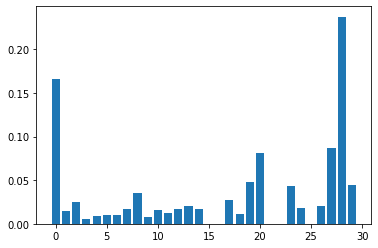

In [44]:
# xgboost for feature importance on a classification problem
# define the model
model = XGBClassifier()
# fit the model
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
cm = confusion_matrix(test_y, y_pred)
print(cm)
print(classification_report(test_y,y_pred ))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [192]:
#svd = TruncatedSVD(n_components=10)
#arr = svd.fit_transform(X)
#arr = pd.DataFrame(arr)
#new_X = pd.concat([X, arr], axis=1)
#new_X[new_X.columns] = scaler.fit_transform(new_X[new_X.columns])

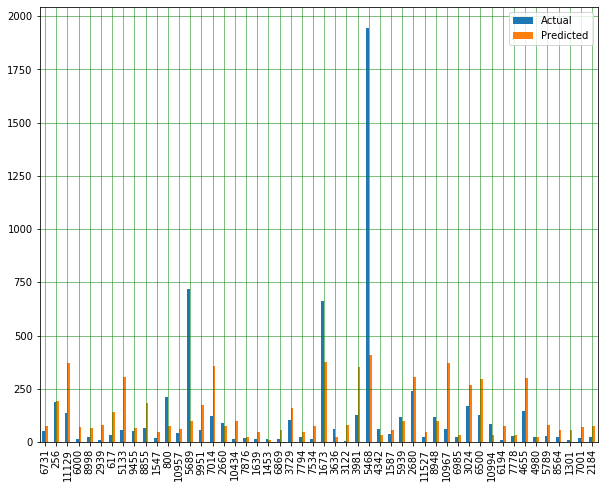

Mean Absolute Error: 125.01026896269398
Mean Squared Error: 232115.21050582628
Root Mean Squared Error: 481.78336470433084


In [207]:
predictions = np.zeros((test_y.shape))
bay_rid = BayesianRidge()
bay_rid.fit(train_X, train_y)
y_pred = bay_rid.predict(test_X)
df_1 = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
df_1 = df_1.tail(50)

df_1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, y_pred)))

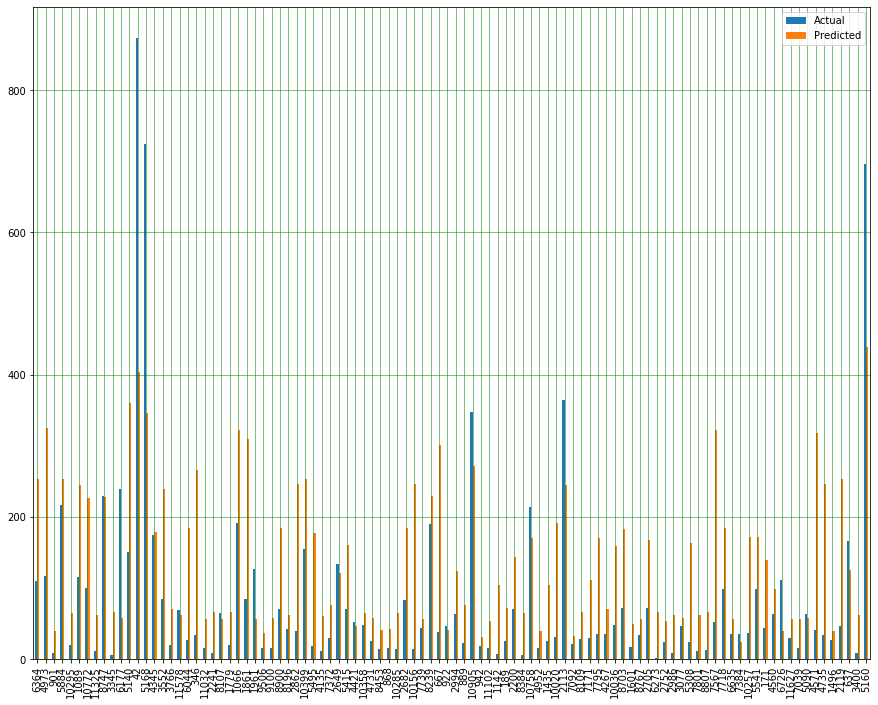

Mean Absolute Error: 154.24008030874197
Mean Squared Error: 419865.6967209335
Root Mean Squared Error: 647.9704443266942


In [200]:
lasso = Lasso()
lasso.fit(train_X, train_y)
y_pred = lasso.predict(test_X)
df_1 = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
df_1 = df_1.head(100)

df_1.plot(kind='bar',figsize=(15,12))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, y_pred)))

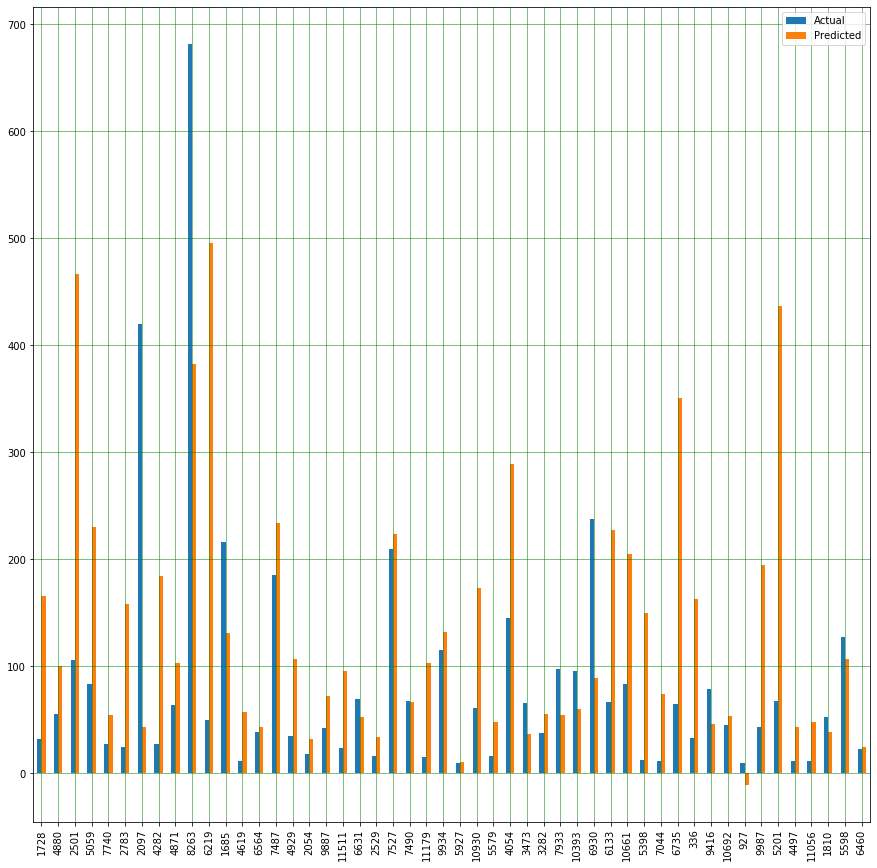

Mean Absolute Error: 155.24931969619493
Mean Squared Error: 419432.53035901574
Root Mean Squared Error: 647.6361095237169


In [201]:
ridge = Ridge(alpha=0.5)
ridge.fit(train_X, train_y)
y_pred = ridge.predict(test_X)
df_1 = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
df_1 = df_1.tail(50)

df_1.plot(kind='bar',figsize=(15,15))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, y_pred)))

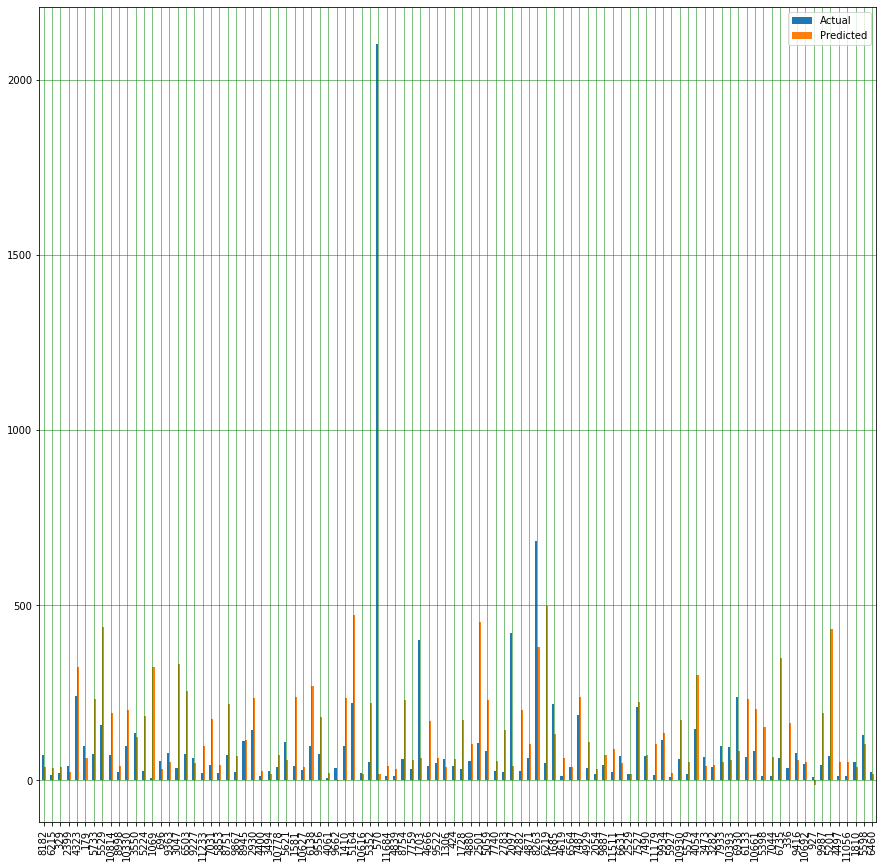

Mean Absolute Error: 155.03890551517742
Mean Squared Error: 419700.7191107311
Root Mean Squared Error: 647.8431284738082


In [202]:
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)
y_pred = lin_reg.predict(test_X)
df_1 = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
df_1 = df_1.tail(100)

df_1.plot(kind='bar',figsize=(15,15))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, y_pred)))